# Implementar Hierarchical Clustering aglomerativo

Hierarchical clustering <strong>es</strong> un enfoque de agrupamiento de datos utilizado para crear grupos jerárquicos de objetos similares. Utiliza un enfoque de árbol para representar los grupos y sus relaciones. Se trata de un enfoque aglomerativo que comienza con cada objeto como un grupo individual y los fusiona en grupos más grandes según ciertas medidas de similitud.

<img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.datanovia.com%2Fen%2Fwp-content%2Fuploads%2Fdn-tutorials%2F003-hierarchical-clustering-in-r%2Ffigures%2F003-divisive-hierarchical-clustering-compute-diana-1.png&f=1&nofb=1&ipt=9417dd52b76621ce8b4b1473d19f687e52fdc402db25f7f14926f5ca90a64cc7&ipo=images' height='430'>

### Importar librerías y preparar datos de prueba

In [1]:
# Importar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Para ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generar datos sintéticos
x, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

# Crear Dataframe
df_blobs = pd.DataFrame(
    {
        'x1': x[:, 0],
        'x2': x[:, 1],
        'y': y,
    }
)

# Crear Dataframe con los centroides
df_centers = pd.DataFrame(
    {
        'x1': c[:, 0],
        'x2': c[:, 1],
    }
)

### Visualizar datos

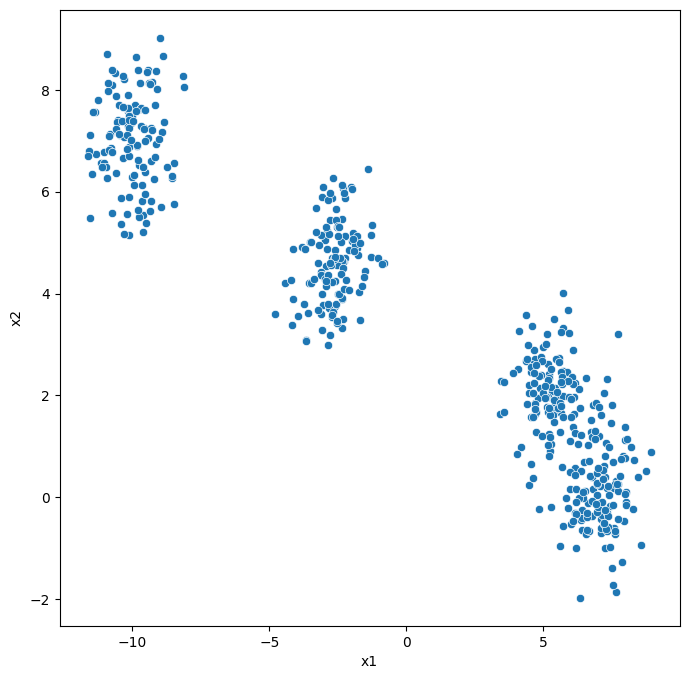

In [3]:
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
plt.show()

### Dendrograma y hierarchical clustering

Un dendrograma es un gráfico que utiliza una jerarquía de ramificaciones para representar la relación de similitud entre los elementos de un conjunto.

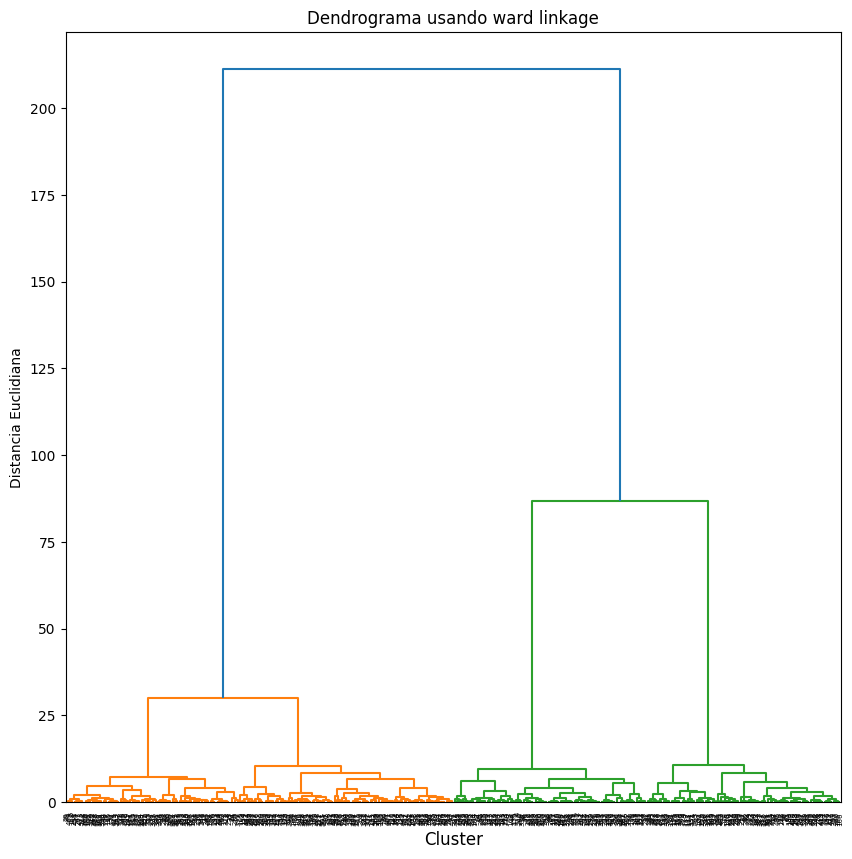

In [4]:
# Graficar dendograma
fig = plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(linkage(x, method='ward'))
plt.title('Dendrograma usando ward linkage')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Distancia Euclidiana')
plt.show()

In [5]:
# Aplicar hierarchical clustering por aglomeración
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

In [6]:
# Asignar la predicción a la siguiente variable
df_blobs['cluster'] = y_hc

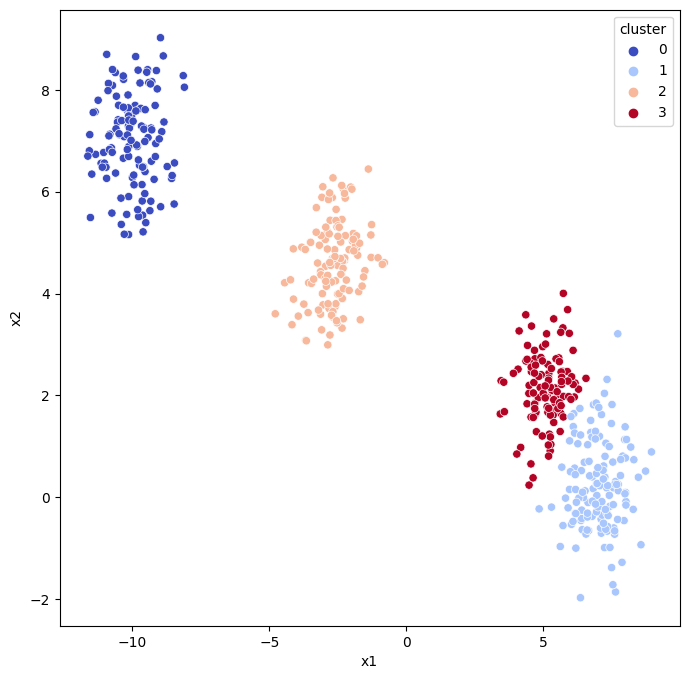

In [7]:
# Graficar
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_blobs, x='x1' ,y='x2', hue='cluster', palette='coolwarm')
plt.show()

### Evaluar los resultados

In [8]:
# Gráfico de silueta
silhouette_score(x, y_hc)

0.6728544629217974

For n_clusters = 3 The average silhouette_score is : 0.7953001961029253
For n_clusters = 4 The average silhouette_score is : 0.6728544629217974
For n_clusters = 5 The average silhouette_score is : 0.5494928839555119


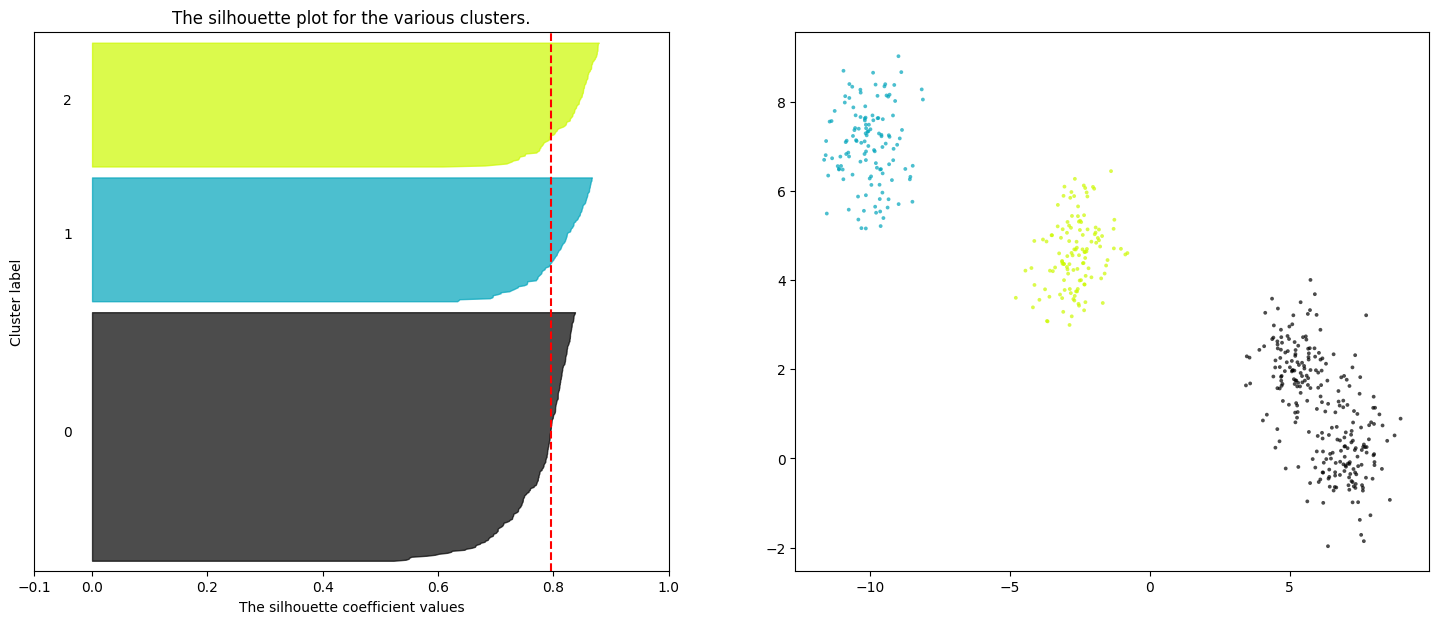

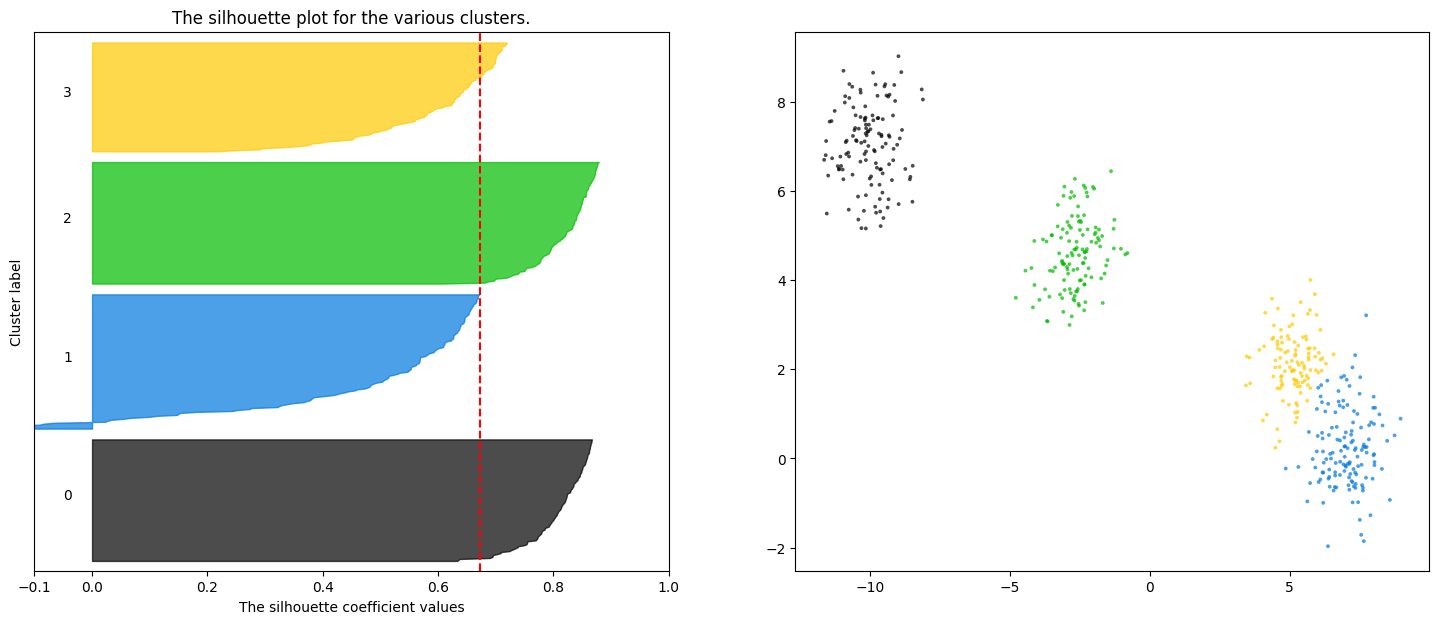

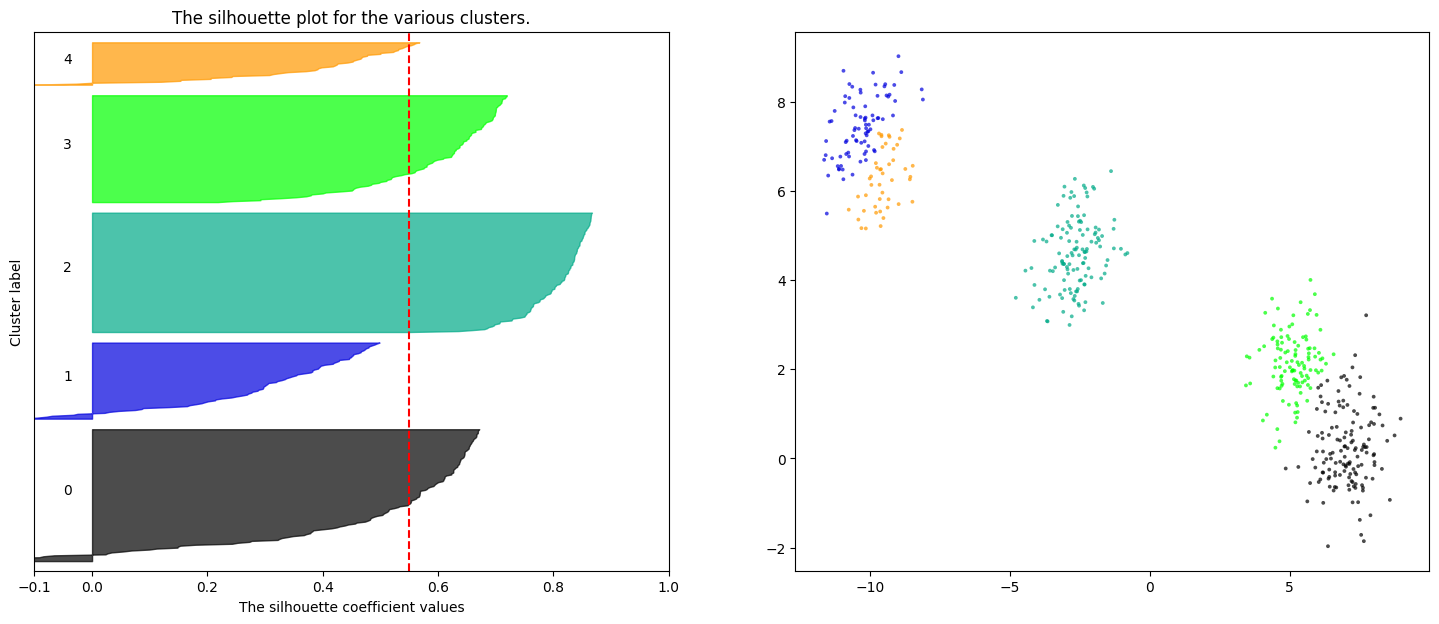

In [9]:
# Generar la gráfica de los coeficientes de silueta
range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(x)

    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor = color,
            edgecolor = color,
            alpha = 0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    
plt.show()

Como conclusión, La mejor opcion es el segundo gráfico, con 4 clusters.